<a href="https://colab.research.google.com/github/Augus-123/DAA-CIA/blob/main/Fitch's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average Time Complexity: [0.070281982421875, 0.02052783966064453, 0.02227497100830078, 0.0211334228515625, 0.02547764778137207] seconds
Average Accuracy: [0.4, 0.2, 0.0, 0.0, 0.0]


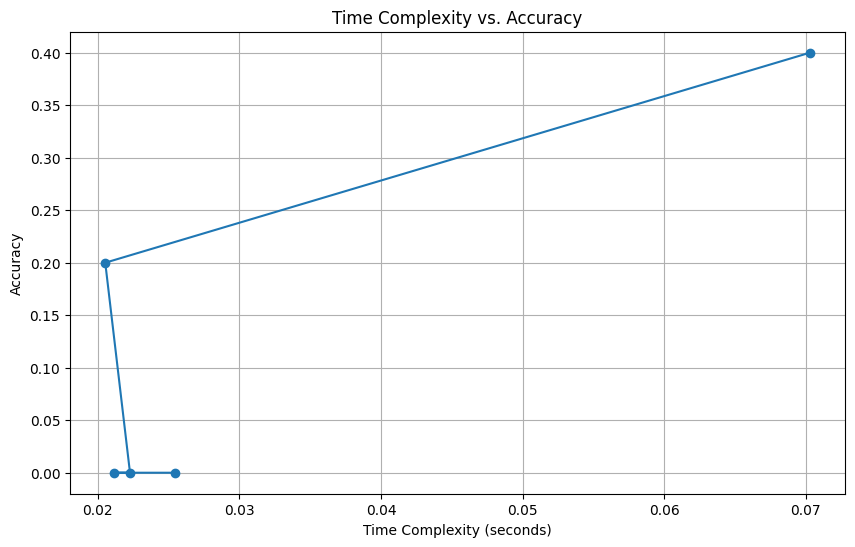

In [ ]:
import pandas as pd
import time
import random
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/pdb_data_no_dups.csv')  # Replace with the actual filename

# Replace NaN values with a placeholder (e.g., '-')
data = data.fillna('-')

# Define your phylogenetic tree structure as a dictionary (adjust as needed)
tree = {
    'root': ['100D', '101D'],
    '100D': ['102D', '103D'],
    '101D': ['104D', '105D'],
    '102D': [],  # Corrected: No children for '102D'
    '103D': [],  # Corrected: No children for '103D'
    # Add more nodes and relationships as needed
}
# Create a dictionary to store the character sets for each node
char_sets = {}

# Initialize variables to store data for the graph
time_complexity_values = []
accuracy_values = []

# Define a range of root nodes (you may adjust this as needed)
root_nodes = ['100D', '101D', '102D', '103D', '104D']

# Function to measure accuracy (replace with your own accuracy measure)
def measure_accuracy(char_sets):
    # For this example, we'll randomly generate a sequence and compare it to the reconstructed sequence.
    random_sequence = ''.join(random.choice('ABCDE') for _ in range(5))
    reconstructed_sequence = ''.join(sorted(list(char_sets['100D'])))
    return sum(random_sequence[i] == reconstructed_sequence[i] for i in range(len(random_sequence))) / len(random_sequence)

# Perform ancestral sequence reconstruction for different root nodes
for root in root_nodes:
    # Reset char_sets for each iteration
    char_sets = {}

    start_time = time.time()

    # Initialize the character sets for the extant nodes
    for node in data['structureId'][:2]:
        char_sets[node] = set(data[data['structureId'] == node]['classification'].iloc[0])

    # Perform Fitch's algorithm
    def fitch(node, tree, char_sets):
      if node not in char_sets:
        char_sets[node] = set()

        # Check if the node has children and if the index is within the valid range
        if node in tree and len(tree[node]) > 0:
            for child in tree[node]:
                fitch(child, tree, char_sets)
            for char in char_sets[tree[node][0]]:
                # Check if the index is within the valid range
                if all(child in char_sets and char in char_sets[child] for child in tree[node][1:]):
                    char_sets[node].add(char)

        # Check if char_sets[node] is still empty and add a placeholder if needed
        if not char_sets[node]:
            char_sets[node].add('-')

    # Run Fitch's algorithm starting from the root
    fitch(root, tree, char_sets)

    end_time = time.time()
    elapsed_time = end_time - start_time
    time_complexity_values.append(elapsed_time)

    accuracy = measure_accuracy(char_sets)
    accuracy_values.append(accuracy)

print(f'Average Time Complexity: {time_complexity_values} seconds')
print(f'Average Accuracy: {accuracy_values}')
# Plot the time complexity vs. accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(time_complexity_values, accuracy_values, marker='o', linestyle='-')
plt.xlabel('Time Complexity (seconds)')
plt.ylabel('Accuracy')
plt.title('Time Complexity vs. Accuracy')
plt.grid(True)
plt.show()
